# Customer Personality Analysis

In [27]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
# Load the dataset
df = pd.read_csv("marketing_campaign.csv", sep='\t')  # This dataset uses tab-separated values
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


Basic Exploration

In [29]:
# Check shape and column info
print("Shape:", df.shape)
df.info()

Shape: (2240, 29)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases   

In [30]:
# Check for missing values
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [31]:
# Basic statistics
df.describe(include='all')

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2240,2240,2216.000000,2240.000000,2240.000000,2240,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
unique,NaN,NaN,5,8,NaN,NaN,NaN,663,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Graduation,Married,NaN,NaN,NaN,31-08-2012,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1127,864,NaN,NaN,NaN,12,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5592.159821,1968.805804,NaN,NaN,52247.251354,0.444196,0.506250,NaN,49.109375,303.935714,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,NaN,NaN,25173.076661,0.538398,0.544538,NaN,28.962453,336.597393,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,NaN,NaN,1730.000000,0.000000,0.000000,NaN,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,NaN,NaN,35303.000000,0.000000,0.000000,NaN,24.000000,23.750000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,NaN,NaN,51381.500000,0.000000,0.000000,NaN,49.000000,173.500000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,NaN,NaN,68522.000000,1.000000,1.000000,NaN,74.000000,504.250000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000


In [32]:
# Remove duplicate rows if any
df = df.drop_duplicates()

In [33]:
# Rename columns - lowercase and replace spaces with underscores
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

In [34]:
# View columns with missing values
df.isnull().sum()

# Example: Fill missing income with median
df['income'] = df['income'].fillna(df['income'].median())

In [35]:
# Convert Dt_Customer to datetime
df['dt_customer'] = pd.to_datetime(df['dt_customer'], format='%d-%m-%Y')

# Ensure 'income' is float and age is int
df['income'] = df['income'].astype(float)
df['year_birth'] = df['year_birth'].astype(int)

In [36]:
# Standardize education and marital_status values
df['education'] = df['education'].str.strip().str.lower()
df['marital_status'] = df['marital_status'].str.strip().str.lower()

Initial Exploration + Univariate EDA

In [37]:
# Create Age column from year_birth
df['age'] = 2025 - df['year_birth']

# Create Customer Tenure (how long they’ve been a customer)
df['customer_tenure'] = (pd.Timestamp("2025-01-01") - df['dt_customer']).dt.days

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


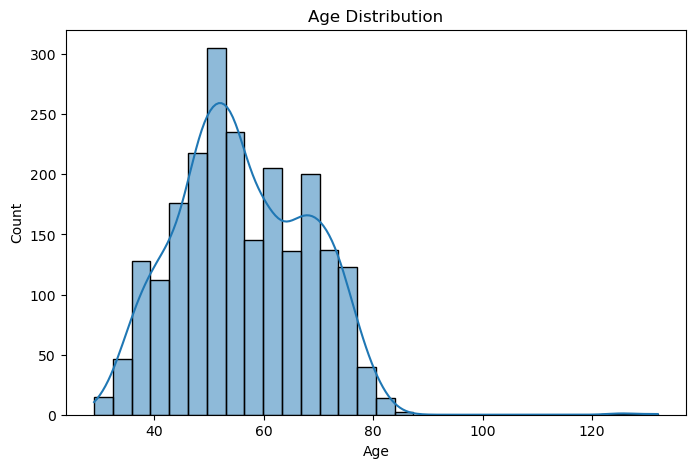

In [38]:
# Age Distribution
plt.figure(figsize=(8,5))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


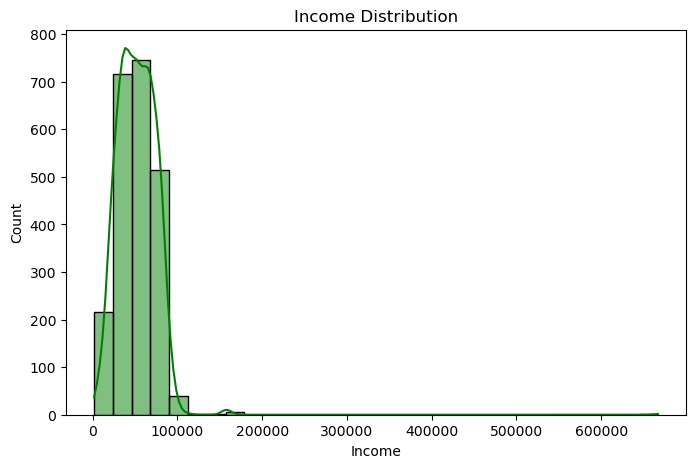

In [39]:
# Income Distribution
plt.figure(figsize=(8,5))
sns.histplot(df['income'], bins=30, kde=True, color='green')
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()

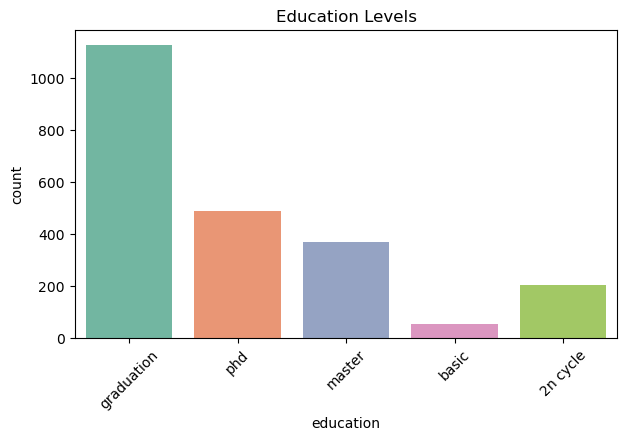

In [40]:
# Education Count
plt.figure(figsize=(7,4))
sns.countplot(x='education', data=df, palette='Set2')
plt.title('Education Levels')
plt.xticks(rotation=45)
plt.show()

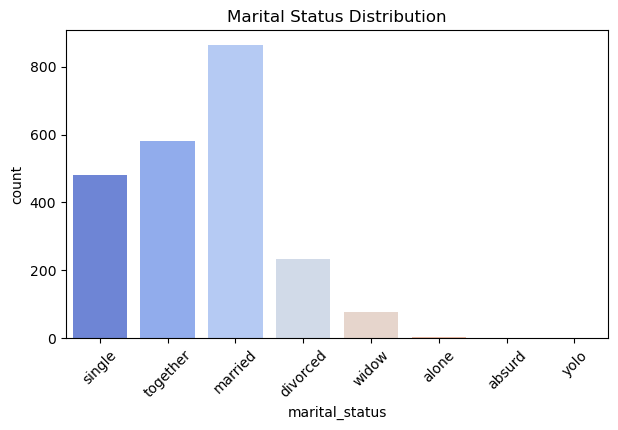

In [41]:
# Marital Status Count
plt.figure(figsize=(7,4))
sns.countplot(x='marital_status', data=df, palette='coolwarm')
plt.title('Marital Status Distribution')
plt.xticks(rotation=45)
plt.show()

Bivariate Visualization

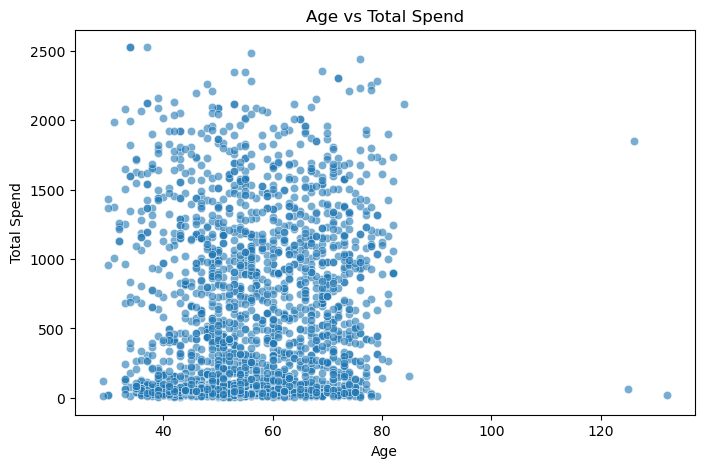

In [42]:
# Total Spend = Sum of all purchases
df['total_spend'] = df[['mntwines', 'mntfruits', 'mntmeatproducts', 'mntfishproducts', 'mntsweetproducts', 'mntgoldprods']].sum(axis=1)

plt.figure(figsize=(8,5))
sns.scatterplot(x='age', y='total_spend', data=df, alpha=0.6)
plt.title('Age vs Total Spend')
plt.xlabel('Age')
plt.ylabel('Total Spend')
plt.show()

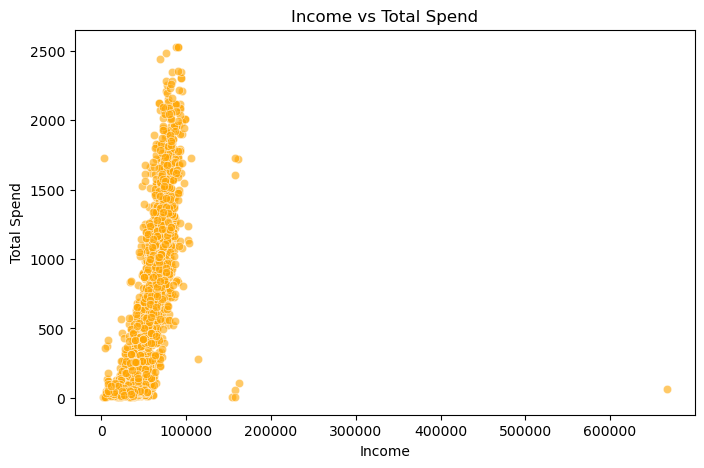

In [43]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='income', y='total_spend', data=df, alpha=0.6, color='orange')
plt.title('Income vs Total Spend')
plt.xlabel('Income')
plt.ylabel('Total Spend')
plt.show()

C:\Users\jaine\AppData\Local\Temp\ipykernel_17224\2245591904.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='marital_status', y='response', data=df, ci=None, palette='Set1')


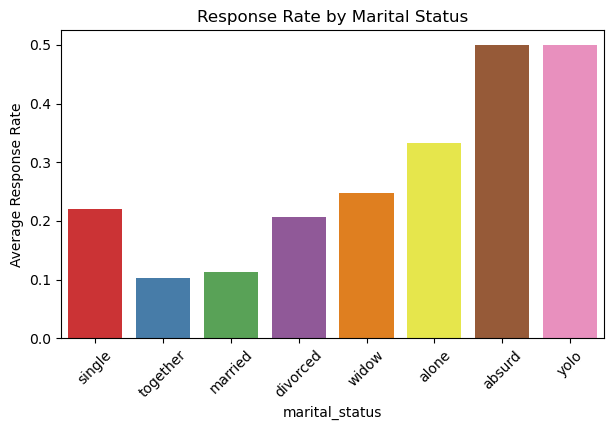

In [44]:
plt.figure(figsize=(7,4))
sns.barplot(x='marital_status', y='response', data=df, ci=None, palette='Set1')
plt.title('Response Rate by Marital Status')
plt.ylabel('Average Response Rate')
plt.xticks(rotation=45)
plt.show()

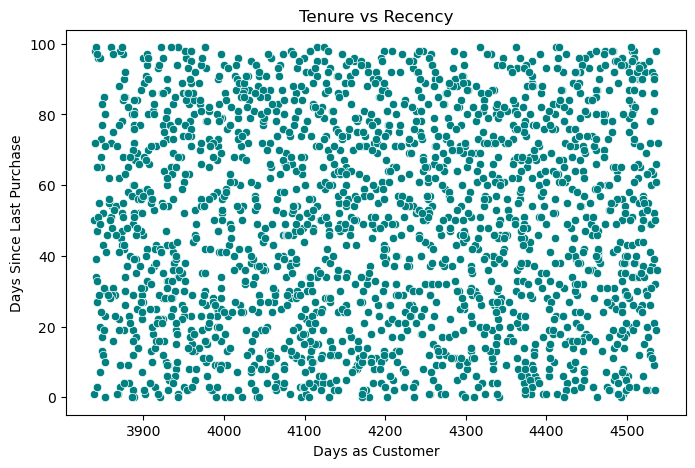

In [45]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='customer_tenure', y='recency', data=df, color='teal')
plt.title('Tenure vs Recency')
plt.xlabel('Days as Customer')
plt.ylabel('Days Since Last Purchase')
plt.show()

One-Hot Encoding + Final Cleanup

In [46]:
df.select_dtypes(include='object').nunique()

education         5
marital_status    8
dtype: int64

In [48]:
# One-hot Encoding
df_encoded = pd.get_dummies(df, columns=['education', 'marital_status'], drop_first=True)

In [49]:
print("Final Shape:", df_encoded.shape)
df_encoded.info()

Final Shape: (2240, 41)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 41 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       2240 non-null   int64         
 1   year_birth               2240 non-null   int32         
 2   income                   2240 non-null   float64       
 3   kidhome                  2240 non-null   int64         
 4   teenhome                 2240 non-null   int64         
 5   dt_customer              2240 non-null   datetime64[ns]
 6   recency                  2240 non-null   int64         
 7   mntwines                 2240 non-null   int64         
 8   mntfruits                2240 non-null   int64         
 9   mntmeatproducts          2240 non-null   int64         
 10  mntfishproducts          2240 non-null   int64         
 11  mntsweetproducts         2240 non-null   int64         
 12  mntgoldpro

In [50]:
# Save for submission
df_encoded.to_csv("cleaned_customer_personality.csv", index=False)

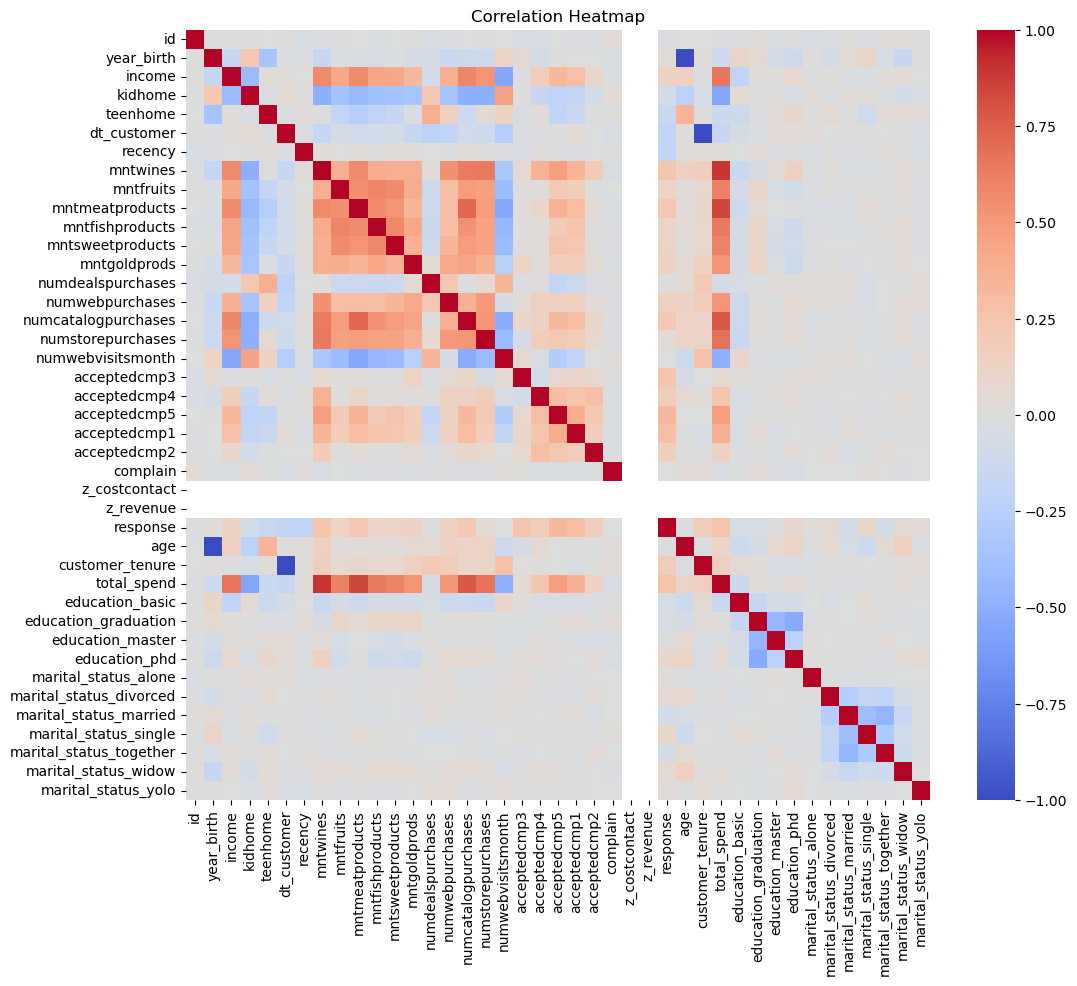

In [51]:
plt.figure(figsize=(12,10))
sns.heatmap(df_encoded.corr(), cmap='coolwarm', center=0)
plt.title("Correlation Heatmap")
plt.show()